<h1 style="color:Red;"> Importing the libaries </h1>

In [50]:
import pandas as pd
import numpy as np

<h1 style="color:Green;"> Sanitisation </h1>

In [51]:
FullSetClean = pd.read_csv("data_edited3.csv")

#####
"""
Put Further Sanitation Code here.
OR any sanitation code
"""
FullSetClean = FullSetClean.drop(columns = "currency")

stateBin = []
for row in FullSetClean["state"]:
    if row == "successful":
        stateBin.append(1)
    else:
        stateBin.append(0)

FullSetClean["StateBin"] = stateBin
FullSetClean = FullSetClean.drop(columns = "state")
FullSetClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45585 entries, 0 to 45584
Data columns (total 9 columns):
name                45585 non-null object
category            45585 non-null object
deadline            45585 non-null object
launched            45585 non-null object
backers             45585 non-null int64
country             45585 non-null object
usd_pledged_real    45585 non-null float64
usd_goal_real       45585 non-null float64
StateBin            45585 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.1+ MB


<h1 style="color:Fuchsia;"> The functions related to the words </h1>

<h1 style="color:Teal;"> Letter Related Functions </h1>

In [52]:

def StartingChar(string : str): # discontinued as does not output a numerical number that could be used later.
    return string[0]

def Length(string : str):
    return len(string)

def NumberOfWords(string :  str):
    output = 0
    string = string.split()
    for word in string:
         if any(c.isalpha() for c in word): ##sees if there is a letter in the collection of chars
                output += 1
    return output

def Capitilisation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char.islower():
            plus +=1
        elif char.isupper():
            minus += 1
    return (plus/(plus + minus))

def Punctuation(string : str):
    plus = 0
    minus = 0
    for char in string:
        if char in ". , / ? ; : ‘ () !”":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def nonPunctuation(string:str):
    plus = 0
    minus = 0
    for char in string:
        if char in "\|£$%^&*-_+={}[]@~#<>¬":
            plus +=1
        else:
            minus += 1
    return (plus/(plus + minus))

def Vowels(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "aeiou":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def Plositives(string : str):
    plus = 0
    minus = 0
    string = string.lower()
    for char in string:
        if char in "ptkbdg":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def frictives(string : str):
    plus = 0
    minus = 0
    string  = string.lower()
    for char in string:
        if char in "fsvz":
            plus += 1
        elif char.isalpha():
            minus += 1
    return (plus/(plus + minus))

def alliteration(string : str):
    output = 0
    string = string.lower()
    string = string.split()
    previousLetter = ""
    output = 0
    for word in string:
        if word[0] == previousLetter:
                output += 1
        else:
            previousLetter = word[0]
        
    return output

functionList = [
                [Length , "Word Length"],
                [NumberOfWords , "Number Of Words"],
                [Capitilisation , "Capitilisation"],
                [Punctuation , "Punctuation"],
                [nonPunctuation , "nonPunctuation"],
                [Vowels , "Vowels"],
                [Plositives, "Plositives"],
                [frictives,"frictives"],
                [alliteration,"alliteration"]
               ]
    
print(NumberOfWords("Test Test test a!")) 
print (frictives("test test test"))
print (Capitilisation("TEst Test Test"))
print (alliteration("Fest Test test"))

4
0.25
0.6666666666666666
1


In [53]:
# At some point this will be changed to a genralised function.
#base plan:
#all the analytics function will take a string return a number (float or int 64 )

#there will be an itterator high order function that takes the analytic function. 
#and the applies it to all of the titles and returns a list


###The itterator high order

def itterator(function,ColName,dataSet):
    output = list()
    for n , string in enumerate(dataSet["name"]):
        output.append(function(string))
    dataSet[ColName] = output
    


In [54]:

for point in functionList:
    itterator(point[0],point[1],FullSetClean)
    print(point[0])

print ("done functions")

<function Length at 0x7f2a33e79378>
<function NumberOfWords at 0x7f29e77c5d08>
<function Capitilisation at 0x7f29e77c5b70>
<function Punctuation at 0x7f29e77c5ea0>
<function nonPunctuation at 0x7f29edd19268>
<function Vowels at 0x7f2a31376d90>
<function Plositives at 0x7f2a30f6ed90>
<function frictives at 0x7f2a30f6e0d0>
<function alliteration at 0x7f29e74f91e0>
done functions


<h1 style="color:Orange;"> Time Related Functions </h1>

In [55]:
import datetime
def dateTimeitterator(dataSet):
    Launchweekdays = []
    Launchhours = []
    elapsedDays= []
    deadlineweekdays = []
    draw = []
    sraw = []
    
    for n , string in enumerate(dataSet["launched"]):
        date , time = string.split(" ")
        day , month ,year = date.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))

        
        Launchweekdays.append(int(raw.weekday()))
        Launchhours.append(int(hour))
        sraw.append(raw)
        
    for n , string in enumerate(dataSet["deadline"]):
        
        day , month ,year = string.split("/")
        hour, mineut = time.split(":")
        raw = datetime.date(int(year), int(month), int(day))
        deadlineweekdays.append(raw.weekday())
        draw.append(raw)
        

    elapsedDays = [(a - b).days for a, b in zip(sraw, draw)]
    dataSet["LaunchWeekday"] = Launchweekdays
    dataSet["LaunchHour"] =  Launchhours
    dataSet["elapsedDay"] = elapsedDays
    dataSet["deadlineWeekday"] = deadlineweekdays
    
 

In [56]:

dateTimeitterator(FullSetClean)
print ("done Timeritterato")

done Timeritterato


<h1 style="color:salmon;"> Data Base Splitting (to be added data base correction) + Dataset Balancing </h1>

In [57]:
# Data base splitting done bellow 

from sklearn.model_selection import train_test_split

train,other = train_test_split(FullSetClean, test_size=0.6,random_state=0);

validation , test = train_test_split(other, test_size=0.5,random_state=0);

train.head()

# FullSetClean.head()
# FullSetClean.info(verbose = True)

# BALANCES THE TRAINING DATASET:

total = len(train)
nb_pos = train['StateBin'].sum()
nb_neg = total - nb_pos

success_pos = train.loc[train['StateBin'] == 1]
success_neg = train.loc[train['StateBin'] == 0].sample(nb_pos)

resampled_train = pd.concat((success_pos, success_neg))

# CHECKS THAT RESAMPLING HAS BEEN SUCCESSFUL:

# total = len(resampled_train)
# nb_pos = resampled_train['StateBin'].sum()
# nb_neg = total - nb_pos

# print('Successful: {}' .format(nb_pos))
# print('Failed: {}' .format(nb_neg))

# BALANCES THE VALIDATION DATASET:

total = len(validation)
nb_pos = validation['StateBin'].sum()
nb_neg = total - nb_pos

success_pos = validation.loc[validation['StateBin'] == 1]
success_neg = validation.loc[validation['StateBin'] == 0].sample(nb_pos)

resampled_validation = pd.concat((success_pos, success_neg))

# CHECKS THAT RESAMPLING HAS BEEN SUCCESSFUL:

# total = len(resampled_validation)
# nb_pos = resampled_validation['StateBin'].sum()
# nb_neg = total - nb_pos

# print('Successful: {}' .format(nb_pos))
# print('Failed: {}' .format(nb_neg))

<h1 style="color:Purple;"><i> Now for the word proccessing </i></h1>

In [58]:
import re

def sanitiser(title : str) -> list: #takes a string splits into words , makes lower case and removes punctuation
    words = title.split()
    output = []
    for word in words:
       output.append(re.sub(r'\W+', '', word).lower())
    return output

def WordFinder(dataSet,cutoff : int) -> dict and list: #so takes in the data set , a cut off an renturns a list of all words above the cutoff and their percentage chance of succsess
    LargeWordDictionary = {} #The dict for all of the words 
    
    for n , title in enumerate(dataSet["name"]): #goes through the big old list
        temp = sanitiser(title) #sanitises the function
        for word in temp: #basically sees if the word is already in the large list of words if it is then it adds its location in the data base to the end of the dict entry
            try:
                LargeWordDictionary[word].append(n)
            except KeyError:
                LargeWordDictionary[word] = [n]
                
    SmallWordDictionary = {} #small output dictionary
    StateBin = dataSet["StateBin"].tolist() #transfers database to list due to pandas related issues
    for word in LargeWordDictionary: # goes through large dictionary , counts number of instances of each word appearing , and then uses the pointers to find if they were success 
        Suc = 0
        for pointer in LargeWordDictionary[word]:
            Suc += StateBin[int(pointer)]
        length = len(LargeWordDictionary[word])
        if length >= cutoff:
            SmallWordDictionary[word] = [length , Suc/length]
    print(len(SmallWordDictionary))
    
    WordLevels = [[a,[]] for a in range(10)]
    for word in SmallWordDictionary:
        WordLevels[int(SmallWordDictionary[word][1]*10)][1].append(word)
    
    return SmallWordDictionary , WordLevels
        
    #return LargeWordDictionary


def WordScore(title : str,AssementDictionary : dict ,split : int) ->list:
    title = sanitiser(title)
    output = [0 for i in range(split)]
    unique = 0
    for word in title:
        try:
            temp = AssementDictionary[word][1]
            for i in range(split):
                if temp > 1 *((i+1)/split):
                    pass
                else:
                    output[i] += 1
                    break
        except KeyError:
            unique += 1
    return output , unique


def wordItterator(dataset , split): #### UNUSED FUNCTION AT THE MOMENT
    output = []
    for n , title in enumerate(dataSet["name"]):
        output.append(WordScore(title,dataset,assmentDict,split))
    output = np.transpose(output)
    for n , row in enumerate(output):
        dataset[str(n)] = row
        
        
    
def wordWorst(title : str , AssementDict : dict):
    title = sanitiser(title)
    unique = 0
    for word in title:
        try:
            temp = AssementDict[word][1]
            if temp > maximum:
                maximum = temp
            elif temp < minimum:
                minimum = temp
        except KeyError:
            unique += 1
        except NameError:
            maximum , minimum = temp , temp
    
    try:
        return maximum , minimum , unique
    except NameError:
        return 0.5 , 0.5 , unique #There may be a better way of dealig with this but this just an easy way to deal with it.
    
    
def wordWorstItterator(dataSet,AssmentDict):
    maximum = []
    minimum = []
    unique = []
    TotalFailures = 0
    for n , title in enumerate(dataSet["name"]):
        temp = wordWorst(title ,AssmentDict )
        maximum.append(temp[0])
        minimum.append(temp[1])
        unique.append(temp[2])
        if temp[0] > 0.7 and temp[1] < 0.3:
            TotalFailures += 1
    dataSet["maximum"] = maximum
    dataSet["minimum"] = minimum
    dataSet["unique"] = unique
    print(TotalFailures)
    
sanitiser("ghgh ghgh!!!!  FDKFKF  g")

#728 2633 56

['ghgh', 'ghgh', 'fdkfkf', 'g']

In [59]:
TrainAll,TrainClasses = WordFinder(resampled_train,20)

wordWorstItterator(resampled_train,TrainAll)
wordWorstItterator(resampled_validation,TrainAll)
wordWorstItterator(test,TrainAll)

print(TrainClasses)

print (WordScore("miniatures blank food",TrainAll,10))



578
107
103
132
[[0, []], [1, ['app', 'clothing', 'online', 'beauty', 'media', 'startup', 'social', 'based', 'care']], [2, ['truck', 'food', 'brand', 'radio', 'my', 'tshirt', 'website', 'jewelry', 'products', 'healthy', 'shop', 'tv', 'fitness', 'apparel', 'want', 'trump', 'network', 'platform', 'escape', 'fashion', 'line', 'learning', 'y', 'education', 'community', 'mind', 'business', 'than', 'iphone', 'christian']], [3, ['phone', 'n', 'living', 'innovative', 'after', 'mobile', 'how', 'people', 'android', 'friends', 'life', 'handmade', 'sports', 'en', 'de', 'case', 'live', 'system', 'el', 'revolution', 'virtual', 'painting', 'records', 'toy', 'movie', 'journey', 'vegan', 'wear', 'star', 'guide', 'body', 'organic', 'club', 'bar', 'me', 'cafe', 'garden', 'building', 'making', 'vr', 'power', 'natural', 'can', 'start', 'america', 'dog', 'fan', 'free', 'local', 'sustainable', 'take', 'what', 'restaurant', 'photo', 'audio', 'urban', 'lets', 'dreams', 'just', 'children', 'survival', 'italian'

<h1 style="color:DodgerBlue;"> Now For the Graphs </h1>

In [60]:
def percentageAtIntervalFloat(dataSet ,varible : str,splits : int) -> list :
    #create the search thing
    minimum = dataSet[varible].min()
    maximum = dataSet[varible].max()
    print(minimum , maximum)
    difference = maximum - minimum
    space = difference / splits
    output = [[a,[0,0]] for a in np.arange(minimum,maximum,space)]
    testLevels = [a for a in np.arange(minimum,maximum,space)]
    Values = dataSet[varible].tolist()
    successes = dataSet["StateBin"].tolist()
    
    for Value , success in zip(Values,successes):
        for n , level in enumerate(testLevels):
            if Value <= level:
                if  success == 1:
                    output[n][1][1] += 1
                else:
                    output[n][1][0] += 1
                break
    
    percentOutput = []
    for level in output:
        if level[1][1] == 0:
            percentOutput.append(0)
        else:
            percentOutput.append(level[1][1]/(level[1][1]+level[1][0]))
    return percentOutput

def percentageAtIntervalInt(dataSet ,varible : str) -> list : ###Recode so that it works with intergers
    #create the search thing
    minimum = dataSet[varible].min()
    maximum = dataSet[varible].max()
    difference = maximum - minimum
    output = [[a,[0,0]] for a in np.arange(minimum,maximum)]
    testLevels = [a for a in np.arange(minimum,maximum)]
    Values = dataSet[varible].tolist()
    successes = dataSet["StateBin"].tolist()
    
    for Value , success in zip(Values,successes):
        for n , level in enumerate(testLevels):
            if Value <= level:
                if  success == 1:
                    output[n][1][1] += 1
                else:
                    output[n][1][0] += 1
                break
    
    percentOutput = []
    for level in output:
        if level[1][1] == 0:
            percentOutput.append(0)
        else:
            percentOutput.append(level[1][1]/(level[1][1]+level[1][0]))
    return percentOutput
    

In [61]:
import matplotlib.pyplot as plt
test["Vowels"].max()
for n , Fun in enumerate(functionList):

    print(Fun[1])
    LookList = percentageAtIntervalFloat(FullSetClean , Fun[1],20)
    plt.subplot(3,3,n + 1)
    plt.plot(LookList)

Word Length
1 60
Number Of Words
1 16
Capitilisation
0.0 1.0
Punctuation
0.0 0.5666666666666667
nonPunctuation
0.0 0.46153846153846156
Vowels
0.0 1.0
Plositives
0.0 1.0
frictives
0.0 0.6666666666666666
alliteration
0 6


<h1 style="color:Navy;"> Machine Learning Code Taken From Tutorial </h1>

In [62]:
###The bit of the code when we standardise the data

resampled_train.drop(columns=["name","usd_pledged_real","launched","backers","deadline"],inplace=True)
resampled_validation.drop(columns=["name","usd_pledged_real","launched","backers","deadline"],inplace=True)



X_train = resampled_train.drop(columns = "StateBin")
Y_train = resampled_train["StateBin"]

X_validation = resampled_validation.drop(columns="StateBin")
Y_validation = resampled_validation["StateBin"]



In [63]:
from sklearn import preprocessing


for col in X_train.columns:
    if X_train[col].dtype == "int64" or X_train[col].dtype == "float64":
        X_means = X_train[col].mean(axis=0)
        X_stds = X_train[col].std(axis=0)

        # Standardise the splits.
        X_train[col] = (X_train[col] - X_means) / X_stds
        X_validation[col] = (X_validation[col] - X_means) / X_stds
    else:
        pass
        le = preprocessing.LabelEncoder()
        le.fit(list(X_train[col].unique()))
        X_train[col] = le.transform(X_train[col]) 
        X_validation[col] = le.transform(X_validation[col]) 
        #X_validation.drop(columns=str(col),inplace=True)


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14914 entries, 2269 to 8444
Data columns (total 19 columns):
category           14914 non-null int64
country            14914 non-null int64
usd_goal_real      14914 non-null float64
Word Length        14914 non-null float64
Number Of Words    14914 non-null float64
Capitilisation     14914 non-null float64
Punctuation        14914 non-null float64
nonPunctuation     14914 non-null float64
Vowels             14914 non-null float64
Plositives         14914 non-null float64
frictives          14914 non-null float64
alliteration       14914 non-null float64
LaunchWeekday      14914 non-null float64
LaunchHour         14914 non-null float64
elapsedDay         14914 non-null float64
deadlineWeekday    14914 non-null float64
maximum            14914 non-null float64
minimum            14914 non-null float64
unique             14914 non-null float64
dtypes: float64(17), int64(2)
memory usage: 2.3 MB


In [64]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

def select_column_to_add(X_train, y_train, X_val, y_val, columns_in_model, columns_to_test):
    
    column_best = None
    columns_in_model = list(columns_in_model)
    
    if len(columns_in_model) == 0:
        acc_best = 0
    elif len(columns_in_model) == 1:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model].values.reshape(-1, 1), y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model].values.reshape(-1, 1)))
    else:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model], y_train)
        acc_best = accuracy_score(y_val, mod.predict(X_val[columns_in_model]))

    
    for column in columns_to_test:
        mod = LogisticRegression(C=1e9).fit(X_train[columns_in_model+[column]], y_train)
        y_pred = mod.predict(X_val[columns_in_model+[column]])
        acc = accuracy_score(y_val, y_pred)
        
        if acc - acc_best >= 0.001:  # one of our stopping criteria
            acc_best = acc
            column_best = column
        
    if column_best is not None:  # the other stopping criteria
        print('Adding {} to the model'.format(column_best))
        print('The new best validation accuracy is {}'.format(acc_best))
        columns_in_model_updated = columns_in_model + [column_best]
    else:
        print('Did not add anything to the model')
        columns_in_model_updated = columns_in_model
    
    return columns_in_model_updated, acc_best , mod

In [65]:
columns_to_test = set(X_train)
full_list = set(X_train)

columns_in_model = list();

for i in range(10):
    columns_in_model , acc , LogicalRegression = select_column_to_add(X_train,Y_train,X_validation,Y_validation,columns_in_model,columns_to_test)    
    columns_to_test = full_list.difference(columns_in_model)
    


Adding maximum to the model
The new best validation accuracy is 0.6099504249291785
Adding usd_goal_real to the model
The new best validation accuracy is 0.6257967422096318
Adding unique to the model
The new best validation accuracy is 0.6319050991501416
Adding elapsedDay to the model
The new best validation accuracy is 0.6362429178470255
Adding minimum to the model
The new best validation accuracy is 0.6381905099150141
Adding LaunchWeekday to the model
The new best validation accuracy is 0.6442988668555241
Did not add anything to the model
Did not add anything to the model
Did not add anything to the model
Did not add anything to the model


<h1> Tree Code </h1>

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib qt 

best_model = None
max_validation_accuracy = 0

AccuracyTraining = []
AccuracyValidation = []
ka = []

for k in range(1):
    model = RandomForestClassifier(random_state=2, n_estimators=14, max_depth=9)
    ka.append(k+1)
    
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(Y_train, y_pred)
    AccuracyTraining.append(accuracy)
    
    y_pred = model.predict(X_validation)
    accuracy = accuracy_score(Y_validation, y_pred)
    AccuracyValidation.append(accuracy)
   

    print('Number of trees: {}, accuracy: {} '.format(k, accuracy))
    if accuracy > max_validation_accuracy:
        max_validation_accuracy = accuracy
        best_model = model

print('Optimal number of trees: {}'.format(len(best_model.estimators_)))

plt.plot(ka,AccuracyTraining)
plt.plot(ka,AccuracyValidation)

Forrest = best_model

#Confusion Matrix
y_pred = Forrest.predict(X_validation)
accuracy = accuracy_score(Y_validation, y_pred)
confusion_matrix(Y_validation, y_pred)

Number of trees: 0, accuracy: 0.6569582152974505 
Optimal number of trees: 14


array([[3592, 2056],
       [1819, 3829]])

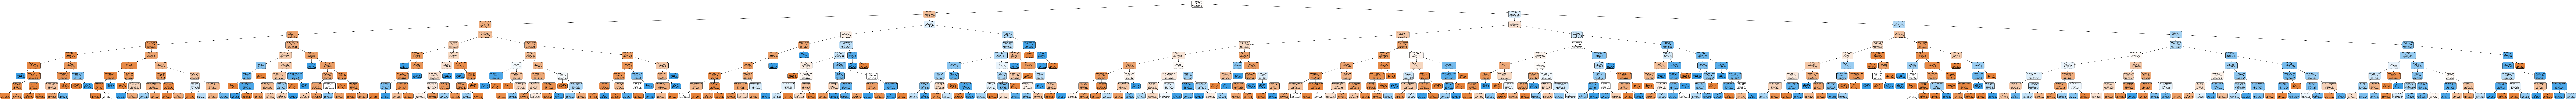

In [67]:
estimator = best_model.estimators_[10]

from sklearn.tree import export_graphviz
# Export as dot file
predictors = X_train.columns

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = predictors,
                class_names = ('Negative', 'Positive'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'nope.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'nope.png')





In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

AccuracyTraining = []
AccuracyValidation = []
Depth = []

# your code here
for i in range(1):
    Depth.append(i + 1)
    model2 = DecisionTreeClassifier(random_state = 1 ,max_depth = 9) # Our classification tree
    model2 = model2.fit(X_train, Y_train)
    
    y_pred = model2.predict(X_train)
    accuracy = accuracy_score(Y_train, y_pred)
    AccuracyTraining.append(accuracy)
    
    y_pred = model2.predict(X_validation)
    accuracy = accuracy_score(Y_validation, y_pred)
    AccuracyValidation.append(accuracy)
    print(accuracy)
    
plt.plot(Depth,AccuracyTraining)
plt.plot(Depth,AccuracyValidation)


tree2 = model2

#Confusion Matrix
y_pred = model2.predict(X_validation)
accuracy = accuracy_score(Y_validation, y_pred)
AccuracyValidation.append(accuracy)
print(accuracy)
    

0.625
0.625


In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# your code here
Y_validation
print('\nFor the validation set:')
print('Accuracy: \t{}'.format(accuracy_score(Y_validation, model2.predict(X_validation))))
print('Precision: \t{}'.format(precision_score(Y_validation, model2.predict(X_validation))))
print('Recall: \t{}'.format(recall_score(Y_validation, model2.predict(X_validation))))



For the validation set:
Accuracy: 	0.625
Precision: 	0.6268871315600287
Recall: 	0.6175637393767706


In [70]:
import sklearn.tree as tree
import graphviz
dot_data = tree.export_graphviz(model2, out_file=None) 
graph = graphviz.Source(dot_data) 

predictors = X_train.columns
export_graphviz (model2, out_file='tree.dot', 
                feature_names = predictors,
                class_names = ('Negative', 'Positive'),
                rounded = True, proportion = False, 
                precision = 2, filled = True)


# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

y_pred = model2.predict(X_validation)
accuracy = accuracy_score(Y_validation, y_pred)
AccuracyValidation.append(accuracy)
print(accuracy) 

0.625


Vector Test

In [71]:
from sklearn.svm import SVC

clf = SVC(gamma='auto' ,C = 0.8)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_validation)
accuracy = accuracy_score(Y_validation, y_pred)
print(accuracy)
    

0.6468661473087819


In [72]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13676 entries, 18243 to 6378
Data columns (total 19 columns):
category           13676 non-null object
country            13676 non-null object
usd_goal_real      13676 non-null float64
Word Length        13676 non-null int64
Number Of Words    13676 non-null int64
Capitilisation     13676 non-null float64
Punctuation        13676 non-null float64
nonPunctuation     13676 non-null float64
Vowels             13676 non-null float64
Plositives         13676 non-null float64
frictives          13676 non-null float64
alliteration       13676 non-null int64
LaunchWeekday      13676 non-null int64
LaunchHour         13676 non-null int64
elapsedDay         13676 non-null int64
deadlineWeekday    13676 non-null int64
maximum            13676 non-null float64
minimum            13676 non-null float64
unique             13676 non-null int64
dtypes: float64(9), int64(8), object(2)
memory usage: 2.1+ MB


<h1>Doing it with the test data </h1> 

In [79]:
#test.drop(columns=["name","usd_pledged_real","launched","backers","deadline"],inplace=True)


X_test = test.drop(columns = "StateBin")
Y_test = test["StateBin"]


for col in X_train.columns:
    if X_train[col].dtype == "int64" or X_train[col].dtype == "float64":
        X_means = X_train[col].mean(axis=0)
        X_stds = X_train[col].std(axis=0)

        # Standardise the splits.
        X_test[col] = (X_trai[col] - X_means) / X_stds
        X_validation[col] = (X_validation[col] - X_means) / X_stds
    else:
        pass
        le = preprocessing.LabelEncoder()
        le.fit(list(X_train[col].unique()))
        X_train[col] = le.transform(X_train[col]) 
        X_validation[col] = le.transform(X_validation[col]) 
        #X_validation.drop(columns=str(col),inplace=True)




modelList = [clf,tree2,Forrest]

for model in modelList:
    print(model)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


ValueError: could not convert string to float: 'GB'

In [ ]:
Bartys todo list:
    Confusing matrix for everything
    Final result for everything
    Backers and not backers
    What catagorys produce the best values
    